In [2]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
n_samples, n_features = X.shape

In [4]:
model = nn.Linear(in_features=n_features, out_features=1)

In [5]:
criterion = nn.MSELoss()

In [6]:
optimizer = torch.optim.SGD(model.parameters(), lr=.01)

In [7]:
for epoch in range(100):
    y_pred = model(X)

    l = criterion(y_pred, y)

    l.backward()

    optimizer.step()

    optimizer.zero_grad()

    if (epoch+1)%10 == 0:
        [w, b] = model.parameters()
        print(f"epoch:{epoch+1}, loss:{l:.3f}, w:{w.item():.3f}, b:{b.item():.3f}")

epoch:10, loss:4424.042, w:11.813, b:1.355
epoch:20, loss:3299.337, w:22.207, b:2.576
epoch:30, loss:2485.754, w:31.064, b:3.468
epoch:40, loss:1896.588, w:38.612, b:4.105
epoch:50, loss:1469.509, w:45.047, b:4.547
epoch:60, loss:1159.636, w:50.533, b:4.843
epoch:70, loss:934.611, w:55.211, b:5.028
epoch:80, loss:771.071, w:59.202, b:5.131
epoch:90, loss:652.131, w:62.606, b:5.174
epoch:100, loss:565.568, w:65.510, b:5.174


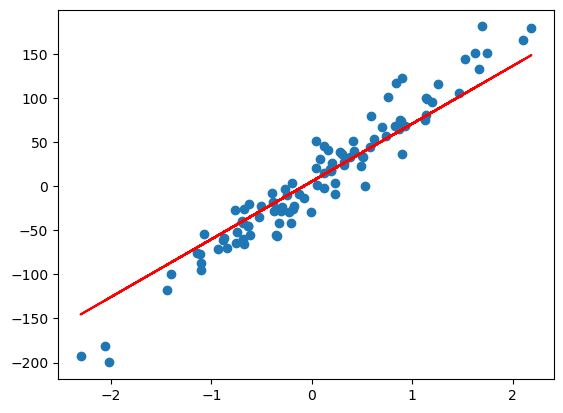

In [8]:
predicted = model(X).detach().numpy()
plt.scatter(X_numpy, y_numpy)
plt.plot(X_numpy, predicted, 'r')
plt.show()